#**Simulate The Analog-Digital Signal using Pulse Code**#


---





>The most common technique to change an analog signal to digital data (digitization) is called pulse code modulation (PCM). A PCM encoder has three processes:


1. The analog signal is sampled.
2. The sampled signal is quantized.
3. The quantized values are encoded as streams of bits.




<h4>The working equation is :<br>
<center>$v(t)=Acos(2πft)$

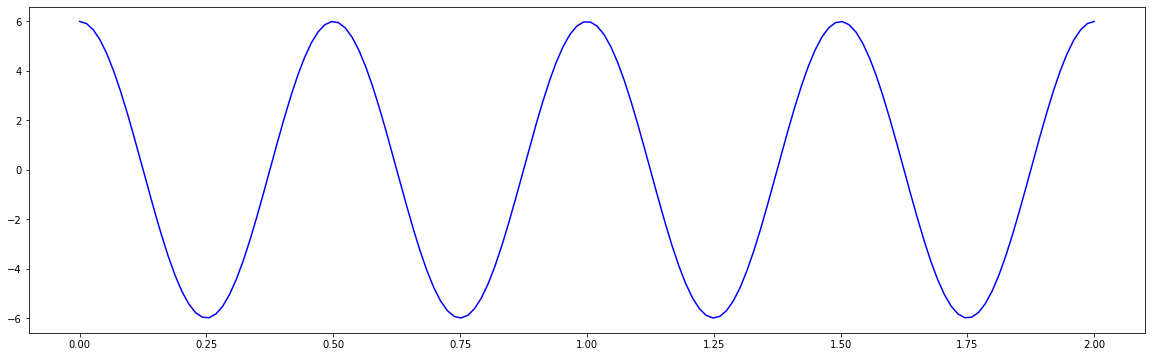

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
A = 6                           
f = 2
T = 1 / f
t = np.linspace(0, 2, 150)
xx = A * np.cos(2.0 * np.pi * f * t)
plt.figure(figsize=(20, 6))
plt.plot(t, xx,'b')
plt.show()



> **Step 1: Sampling**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


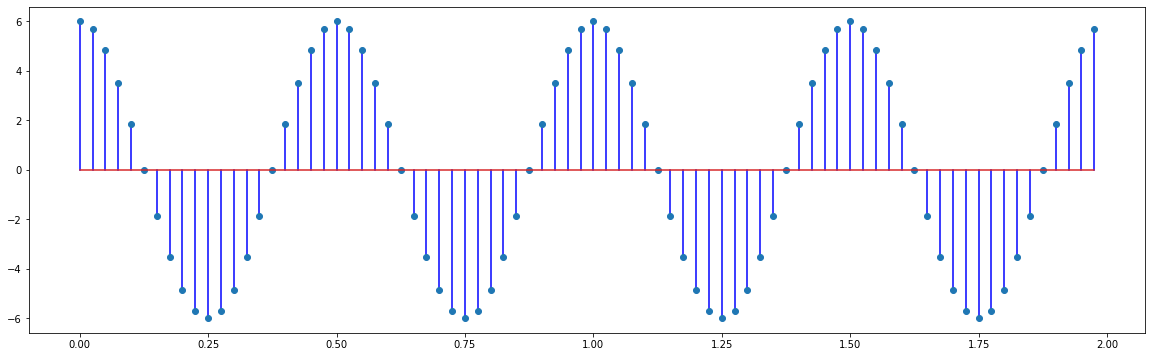

In [ ]:
n = 20
fs = n * f
ts=np.arange(0, 2, 1 / fs)
xxs=A*np.cos(2*np.pi*f*ts);
plt.figure(figsize=(20, 6))
plt.stem(ts, xxs,'b')
plt.show()




> **Step 2: Quantization**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


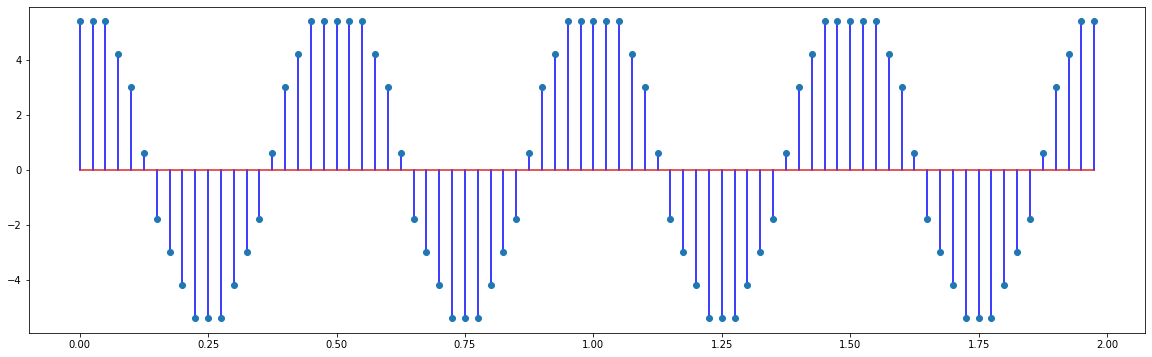

In [ ]:
b_bit = 5
L = 2*b_bit
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(xs)):
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 
plt.figure(figsize=(20, 6))
plt.stem(ts, xq,'b')
plt.show()




> **Step 3: Encoding**




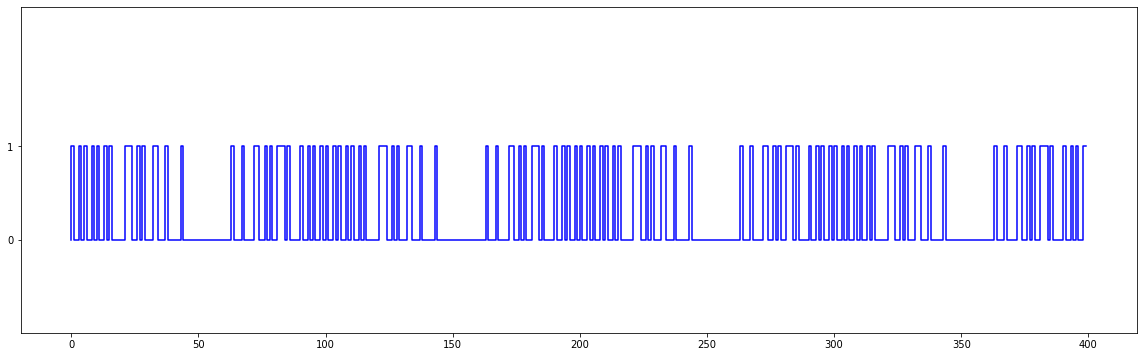

In [ ]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))
plt.figure(figsize=(20,6))
plt.ylim(-1,2.5)
plt.step(pos, binary_codec,'b')
plt.show()